# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

# Dataset: 1

In [2]:
data1.head()

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240


### EDA

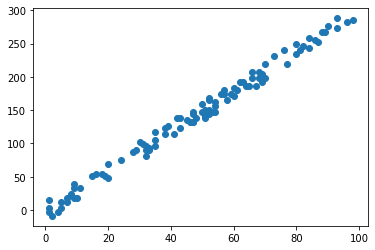

In [3]:
plt.scatter(data1['X'],data1['y'])
plt.show()
# plot shows X,y are linearly dependent on each other

In [5]:
# creating featues values and taget values
X = data1.drop(['Unnamed: 0','y'],axis='columns')
y = data1['y']

In [7]:
from sklearn.model_selection import train_test_split

#spliting the cleaned data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')


Training samples: 80
Test samples: 20


In [8]:
# training the model using linear refression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train,y_train)
predict1 = model1.predict(X_test)

In [9]:
model1.score(X,y)

0.9894040484274216

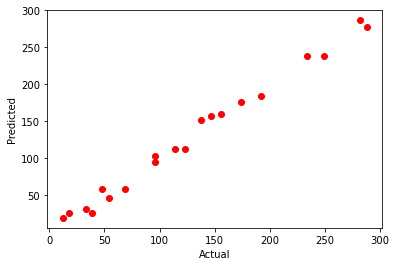

In [10]:
plt.plot(y_test, predict1, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

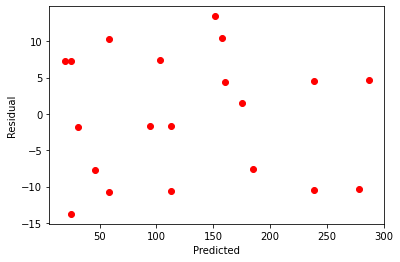

In [26]:
plt.plot(predict1 ,predict1 - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

### Insights from above the plot
- The above plot has randam scatter data points which means residuals do not contradict the linear assumption 

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predict1)
r2
# sice r2 score 99

0.9903579622832346

# Dataset: 2

In [15]:
data2.head()

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560


In [16]:
# converting categorical values into numerical values
dummies = pd.get_dummies(data2['X2'])
dummies

,A,B
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
95,0,1
96,1,0
97,1,0
98,0,1


In [17]:
# joining the converted cagegorical values to the data2
new_data2 = pd.concat([data2,dummies],axis=1)
new_data2

,Unnamed: 0,X1,X2,y,A,B
0,0,50,B,2510,0,1
1,1,82,B,6738,0,1
2,2,66,B,4355,0,1
3,3,35,A,2225,1,0
4,4,81,A,7560,1,0
...,...,...,...,...,...,...
95,95,98,B,9615,0,1
96,96,9,A,1066,1,0
97,97,56,A,4139,1,0
98,98,50,B,2502,0,1


In [18]:
# creating featues values and taget values
X2 = new_data2.drop(['Unnamed: 0','y','X2','B'],axis='columns')
y2 = new_data2['y']

In [20]:
#spliting the cleaned data for training and testing 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20)

print(f'Training samples: {X_train2.shape[0]:,}')
print(f'Test samples: {X_test2.shape[0]:,}')

Training samples: 80
Test samples: 20


In [21]:
# training the model using linear refression
model2 = LinearRegression()
model2.fit(X_train2,y_train2)
predict2 = model2.predict(X_test2)

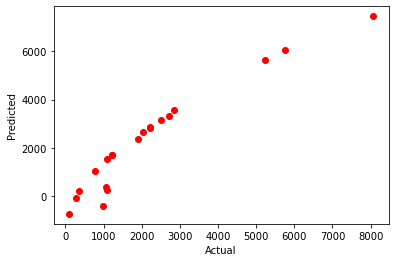

In [22]:
plt.plot(y_test2, predict2, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

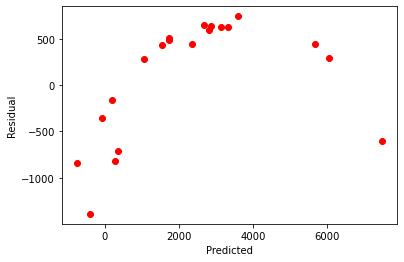

In [23]:
plt.plot(predict2 ,predict2- y_test2, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

### Insights from above the plot
- A definate curve is formed with data points, which indicates there could be other models other than linear model that fits well for the above data

In [24]:
new_r2 = r2_score(y_test2, predict2)
new_r2

0.8960811040930179

In [25]:
model2.score(X2,y2)

0.9219713634706431